In [52]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({'text.usetex': True}) # import to make plots nicer
%config InlineBackend.figure_format = 'svg' # import to make plots nicer
from scipy.integrate import solve_ivp
from matplotlib.lines import Line2D

# Set global font size for title, x-label, and y-label
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16 


# Set global font size for x and y tick labels
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

# Set global font size for the legend
plt.rcParams['legend.fontsize'] = 16

In [53]:
def CAMP_PDEP(t, x, k1, k3, k2, r1, r2, r3, r4, K1, K2, K3, K4, Dt, Et, ACt, PDEt, PDEp):
    cAMP, ACp = x
    dACp = r1 * cAMP * ((ACt - ACp) / K1) - r2 * Dt * ACp / (K2 + ACp)
    dcAMPdT = k1 * ACp - (k3 + k2 * PDEp) * cAMP
    return np.array([dACp, dcAMPdT])

k0, k1, k3, k2 = 0.0, 4.32, 0.58, 3.73
r1, r2, r3, r4 = 0.98, 4.48, 0.1, 0.14
K1, K2, K3, K4 = 2.48, 3.34, 9.24, 7.24
Dt, Et =  2.12, 1.6
ACt = 6.68
PDEt = 4.64

def plot_nullclines(k1, k3, k2, r1, r2, r3, r4, K1, K2, K3, K4, Dt, Et, ACt, PDEt, PDEp):
    cAMP_vals = np.linspace(-30, 30, 10000)
    dACp_vals = np.linspace(-30, 30, 10000)
    cAMP_grid, dACp_grid = np.meshgrid(cAMP_vals, dACp_vals)

    t = 0
    x = np.array([cAMP_grid, dACp_grid])
    nullclines = CAMP_PDEP(t, x, k1, k3, k2, r1, r2, r3, r4, K1, K2, K3, K4, Dt, Et, ACt, PDEt, PDEp)

    plt.figure(figsize=(8, 6))
    plt.contour(cAMP_grid,dACp_grid, nullclines[0], levels=[0], colors='#1f77b4', linestyles='solid', label='cAMP')
    plt.grid(linestyle=':', color='lightgray')
    plt.contour(cAMP_grid,dACp_grid ,nullclines[1], levels=[0], colors='green', linestyles='solid', label='ACp')
    plt.xlabel('cAMP')
    plt.ylabel('ACp')
    plt.legend()
    plt.title(f'Nullclines, PDEp = {PDEp}')
    plt.savefig(f'Nullclines_PDEp_{PDEp}.png', dpi=300)
    plt.show()

C:\Users\Petrb\AppData\Local\Temp\ipykernel_29728\2844284015.py:24: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(cAMP_grid,dACp_grid, nullclines[0], levels=[0], colors='#1f77b4', linestyles='solid', label='cAMP')
C:\Users\Petrb\AppData\Local\Temp\ipykernel_29728\2844284015.py:26: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(cAMP_grid,dACp_grid ,nullclines[1], levels=[0], colors='green', linestyles='solid', label='ACp')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


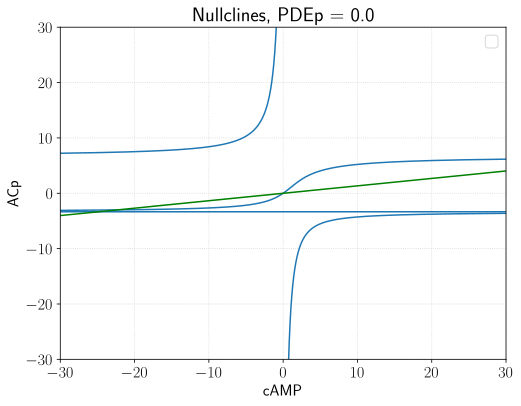

In [54]:
plot_nullclines(4.32, 0.58, 3.73, 0.98, 4.48, 0.1, 0.14, 2.48, 3.34, 9.24, 7.24, 2.12, 1.6, 6.68, 4.64, 0.0)

In [ ]:
def plot_nullclines(k1, k3, k2, r1, r2, r3, r4, K1, K2, K3, K4, Dt, Et, ACt, PDEt, PDEp):
    cAMP_vals = np.linspace(-30, 30, 100)
    dACp_vals = np.linspace(-30, 30, 100)
    cAMP_grid, dACp_grid = np.meshgrid(cAMP_vals, dACp_vals)

    t = 0
    x = np.array([cAMP_grid, dACp_grid])
    nullclines = CAMP_PDEP(t, x, k1, k3, k2, r1, r2, r3, r4, K1, K2, K3, K4, Dt, Et, ACt, PDEt, PDEp)

    plt.figure(figsize=(8, 6))
    plt.contour(cAMP_grid,dACp_grid, nullclines[0], levels=[0], colors='#1f77b4', linestyles='solid')
    plt.contour(cAMP_grid,dACp_grid ,nullclines[1], levels=[0], colors='orange', linestyles='solid')
    plt.grid(linestyle=':', color='lightgray')
    plt.xlabel('cAMP')
    plt.ylabel('PDEp')
    plt.title(f'Nullclines, PDEp = {PDEp}')
    plt.savefig(f'Nullclines_PDEp_{PDEp}zoom.png', dpi=300)
    plt.show()

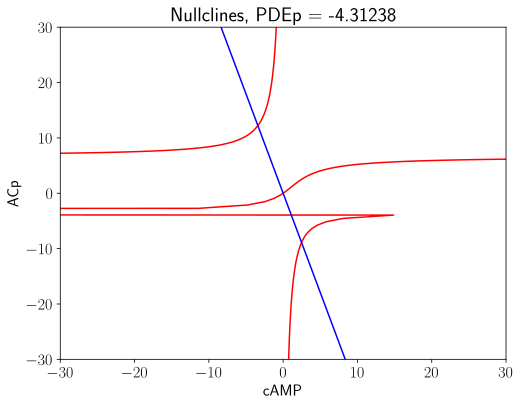

In [32]:
plot_nullclines(4.32, 0.58, 3.73, 0.98, 4.48, 0.1, 0.14, 2.48, 3.34, 9.24, 7.24, 2.12, 1.6, 6.68, 4.64, -4.31238)

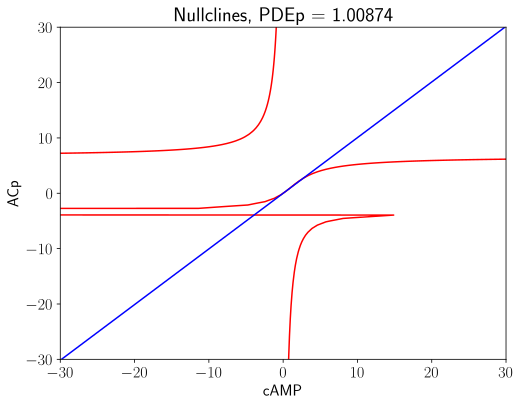

In [33]:
plot_nullclines(4.32, 0.58, 3.73, 0.98, 4.48, 0.1, 0.14, 2.48, 3.34, 9.24, 7.24, 2.12, 1.6, 6.68, 4.64, 1.00874)

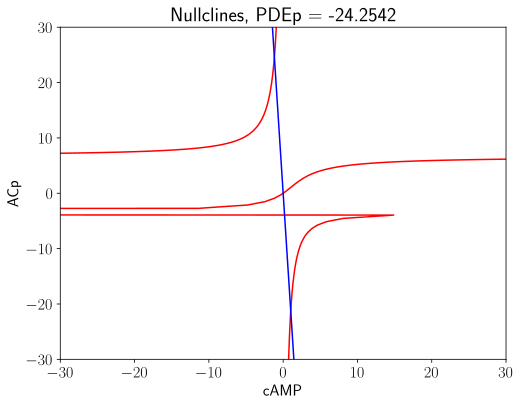

In [34]:
plot_nullclines(4.32, 0.58, 3.73, 0.98, 4.48, 0.1, 0.14, 2.48, 3.34, 9.24, 7.24, 2.12, 1.6, 6.68, 4.64, -24.2542)

In [41]:
def CAMP_PDEP2(t, x, k1, k3, k2, r1, r2, r3, r4, K1, K2, K3, K4, Dt, Et, ACt, PDEt, ACp):
    cAMP, PDEp = x
    dPDEp = r3*cAMP*((PDEt - PDEp)/K3) - r4*Et*PDEp/(K4 + PDEp)
    dcAMPdT = k1 * ACp - (k3 + k2 * PDEp) * cAMP
    return np.array([dPDEp, dcAMPdT])

k0, k1, k3, k2 = 0.0, 4.32, 0.58, 3.73
r1, r2, r3, r4 = 0.98, 4.48, 0.1, 0.14
K1, K2, K3, K4 = 2.48, 3.34, 9.24, 7.24
Dt, Et =  2.12, 1.6
ACt = 6.68
PDEt = 4.64

def plot_nullclines2(k1, k3, k2, r1, r2, r3, r4, K1, K2, K3, K4, Dt, Et, ACt, PDEt, ACp):
    cAMP_vals = np.linspace(-2, 2, 100)
    dACp_vals = np.linspace(-2, 2, 100)
    cAMP_grid, dACp_grid = np.meshgrid(cAMP_vals, dACp_vals)

    t = 0
    x = np.array([cAMP_grid, dACp_grid])
    nullclines = CAMP_PDEP2(t, x, k1, k3, k2, r1, r2, r3, r4, K1, K2, K3, K4, Dt, Et, ACt, PDEt, ACp)

    plt.figure(figsize=(8, 6))
    plt.contour(cAMP_grid,dACp_grid, nullclines[0], levels=[0], colors='r', linestyles='solid')
    plt.contour(cAMP_grid,dACp_grid ,nullclines[1], levels=[0], colors='b', linestyles='solid')
    plt.xlabel('cAMP')
    plt.ylabel('ACp')
    plt.title(f'Nullclines, ACp = {ACp}')
    plt.savefig(f'Nullclines_ACp_{ACp}.png', dpi=300)
    plt.show()

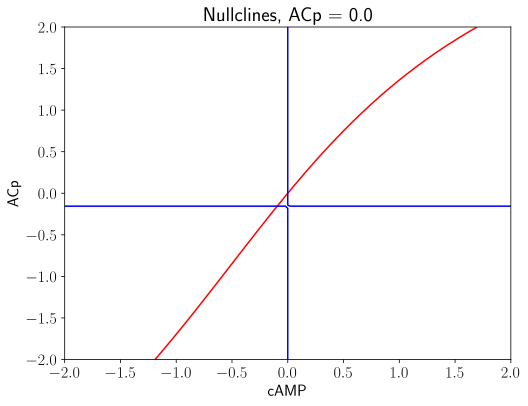

In [42]:
plot_nullclines2(4.32, 0.58, 3.73, 0.98, 4.48, 0.1, 0.14, 2.48, 3.34, 9.24, 7.24, 2.12, 1.6, 6.68, 4.64, 0.0)

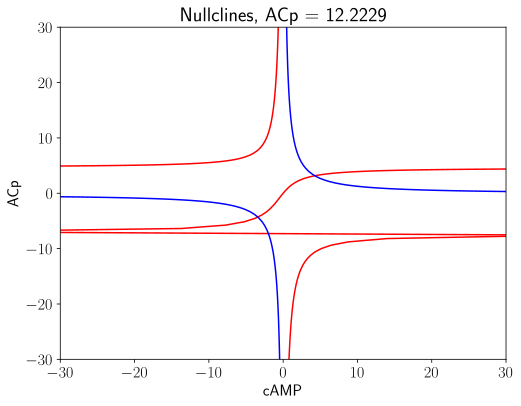

In [37]:
plot_nullclines2(4.32, 0.58, 3.73, 0.98, 4.48, 0.1, 0.14, 2.48, 3.34, 9.24, 7.24, 2.12, 1.6, 6.68, 4.64, 12.2229)

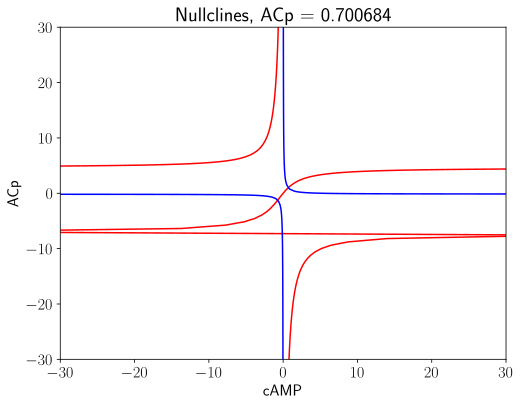

In [38]:
plot_nullclines2(4.32, 0.58, 3.73, 0.98, 4.48, 0.1, 0.14, 2.48, 3.34, 9.24, 7.24, 2.12, 1.6, 6.68, 4.64, 0.700684)

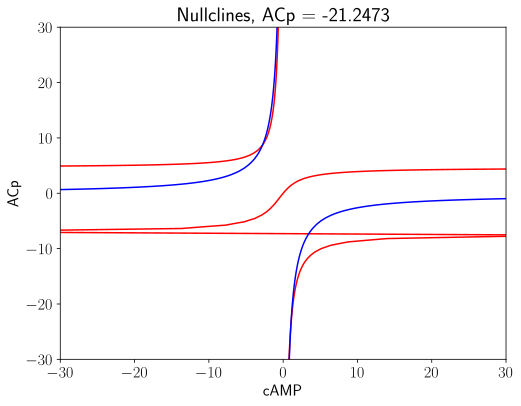

In [39]:
plot_nullclines2(4.32, 0.58, 3.73, 0.98, 4.48, 0.1, 0.14, 2.48, 3.34, 9.24, 7.24, 2.12, 1.6, 6.68, 4.64, -21.2473)